In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
iris_data = pd.read_csv(r'C:\Users\G3mini\Downloads\Internship\IRIS.csv')
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris_data.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

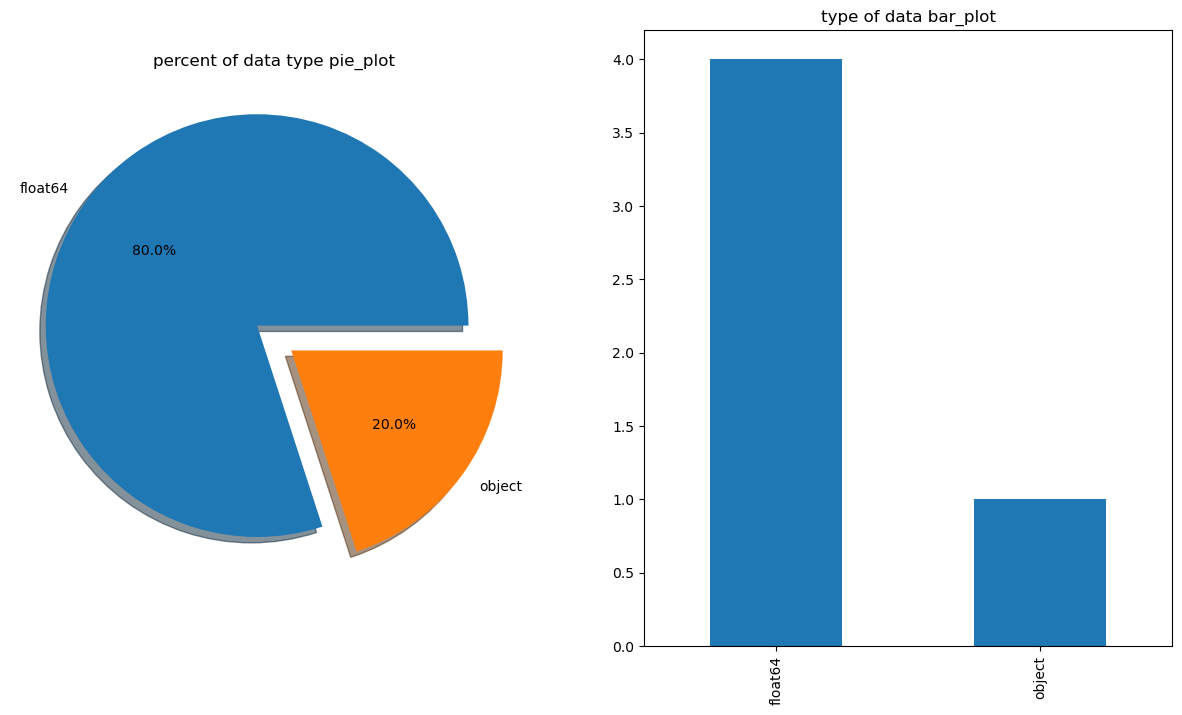

In [11]:
fig, axarr = plt.subplots(1,2,figsize=(15,8))

iris_data.dtypes.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1],shadow=True,ax=axarr[0])
axarr[0].set_title('percent of data type pie_plot')

iris_data.dtypes.value_counts().plot.bar(ax=axarr[1])
axarr[1].set_title('type of data bar_plot')

plt.show()

In [12]:
#default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'
sns.set_style('darkgrid')

<Axes: xlabel='species', ylabel='count'>

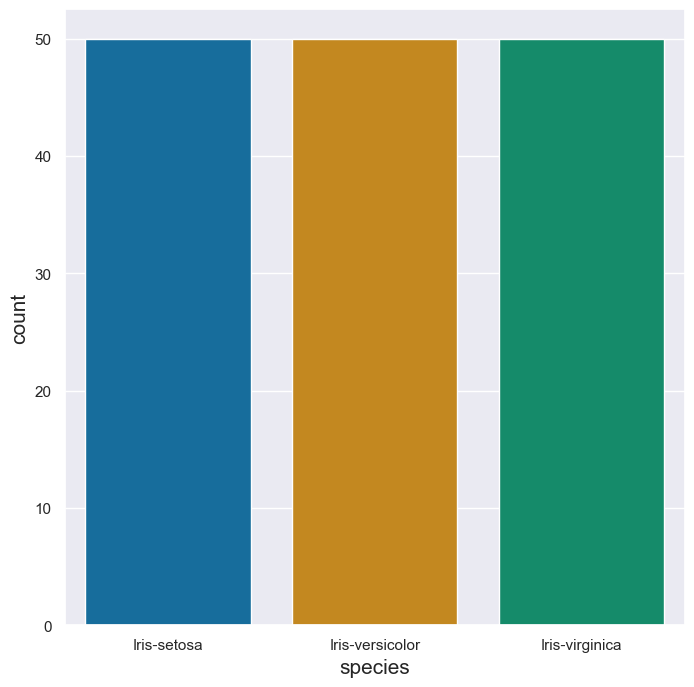

In [13]:
sns.countplot(x='species',data=iris_data)

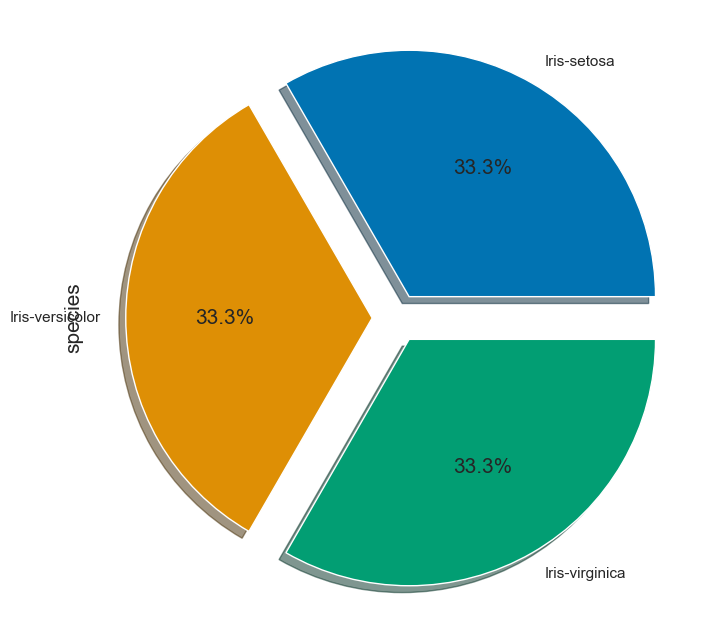

In [14]:
iris_data['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%'
                                        ,shadow=True, figsize=(10,8))
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

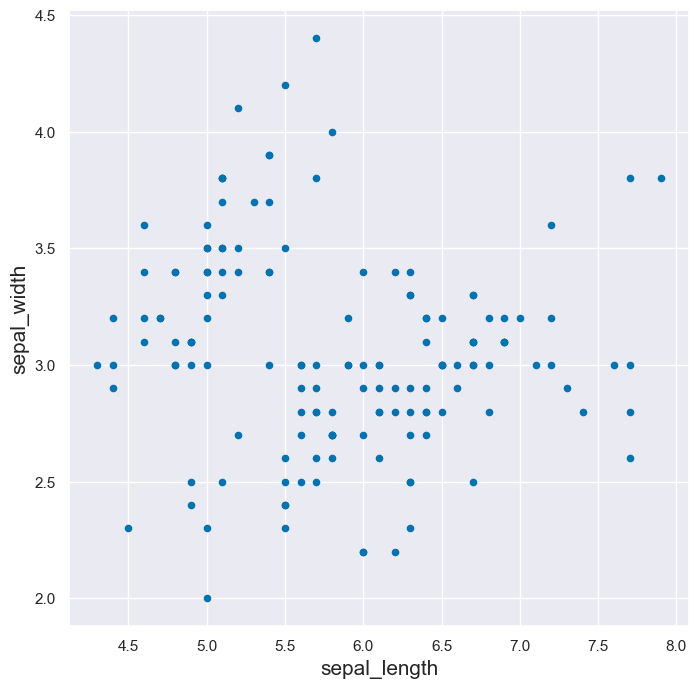

In [15]:
iris_data.plot(kind="scatter", x="sepal_length", y="sepal_width")

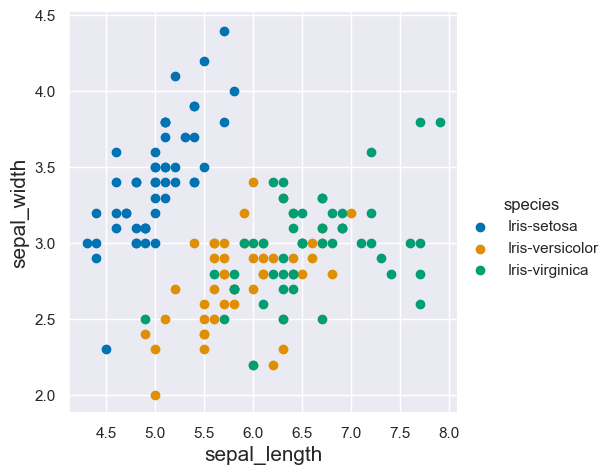

In [24]:
sns.FacetGrid(iris_data, hue="species", height=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

<Axes: xlabel='species', ylabel='petal_length'>

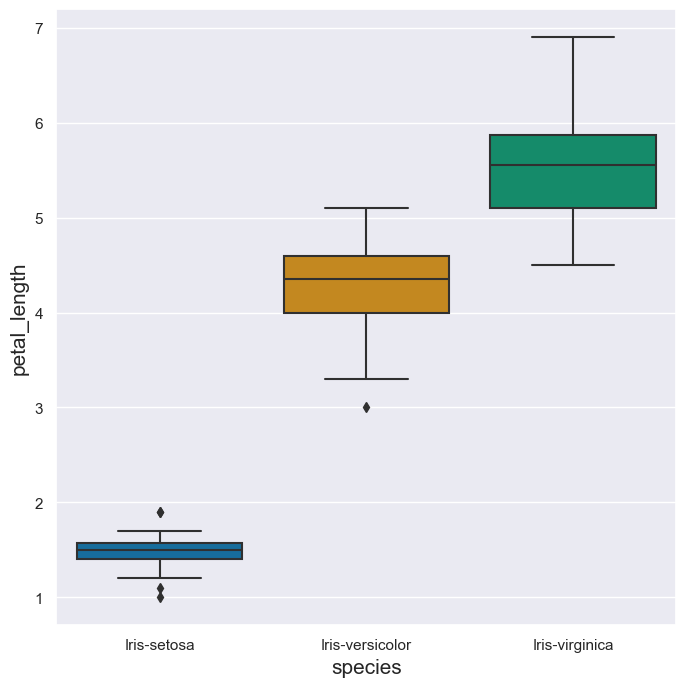

In [25]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="petal_length", data=iris_data)

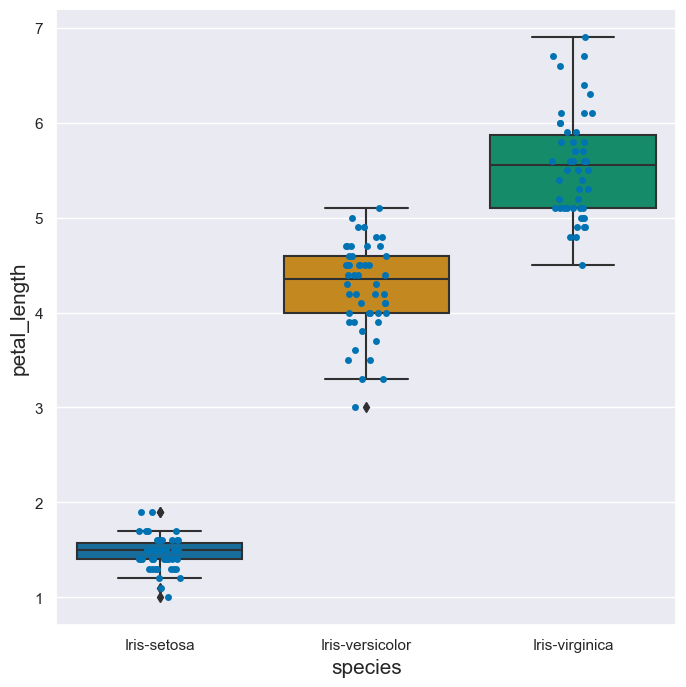

In [26]:
ax = sns.boxplot(x="species", y="petal_length", data=iris_data)
ax = sns.stripplot(x="species", y="petal_length", data=iris_data, jitter=True, edgecolor="gray")

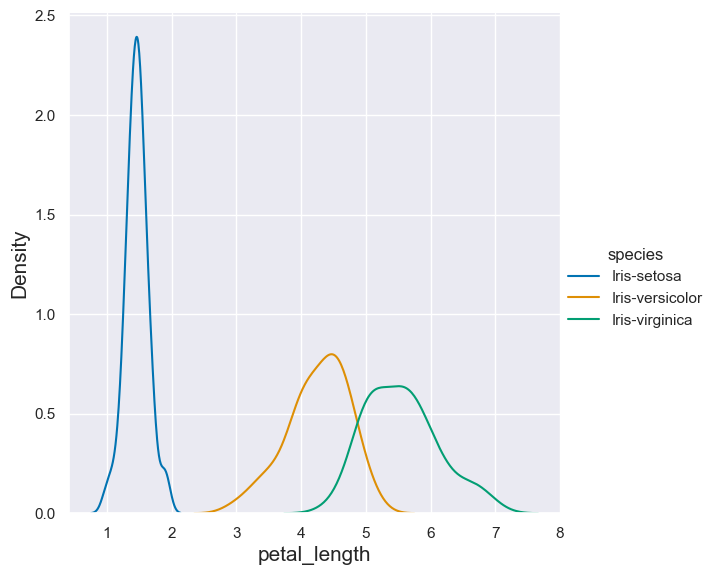

In [27]:
sns.FacetGrid(iris_data, hue="species", height=6).map(sns.kdeplot, "petal_length").add_legend()

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

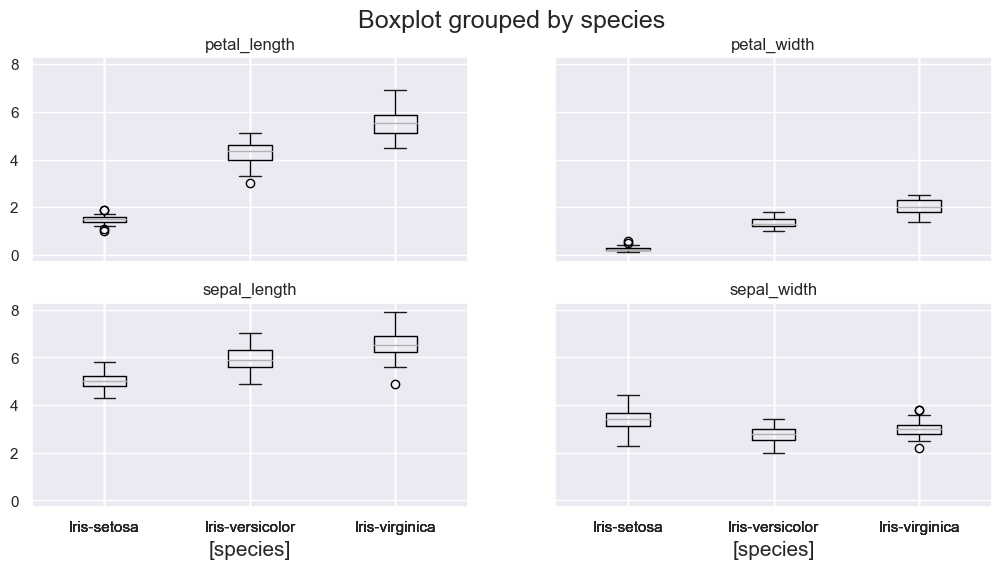

In [30]:
iris_data.boxplot(by="species", figsize=(12, 6))

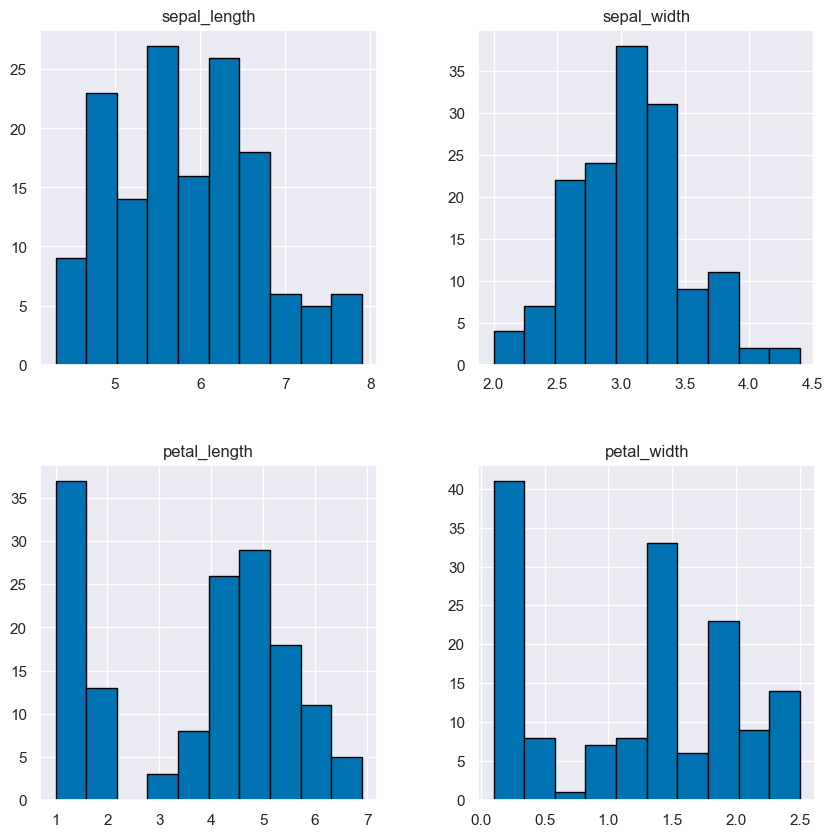

In [31]:
iris_data.hist(edgecolor='black',figsize=(10,10))
plt.show()

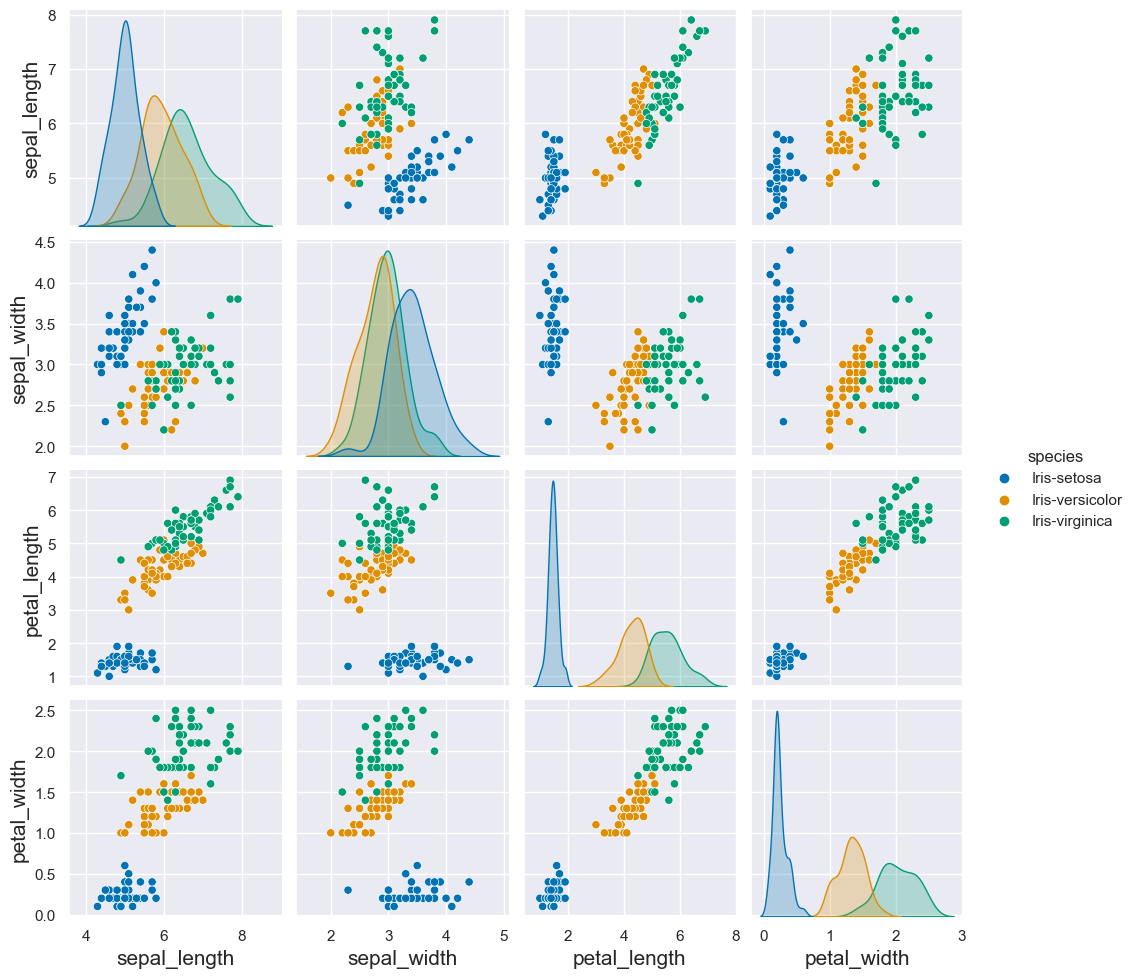

In [32]:
sns.pairplot(iris_data , hue='species');

In [33]:
iris_data.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [34]:
species = {"Species" : {"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}}
iris_data.replace(species,inplace=True)
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
iris_data.corr()

C:\Users\G3mini\AppData\Local\Temp\ipykernel_19440\514728938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [36]:
iris_data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\G3mini\AppData\Local\Temp\ipykernel_19440\2633598819.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
C:\Users\G3mini\AppData\Local\Temp\ipykernel_19440\2633598819.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  iris_data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


In [38]:
x = iris_data.drop('species', axis=1)
y= iris_data.species
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [41]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(x_test, y_test)))

The accuracy of the knn classifier is 0.97 out of 1 on training data
The accuracy of the knn classifier is 0.97 out of 1 on test data


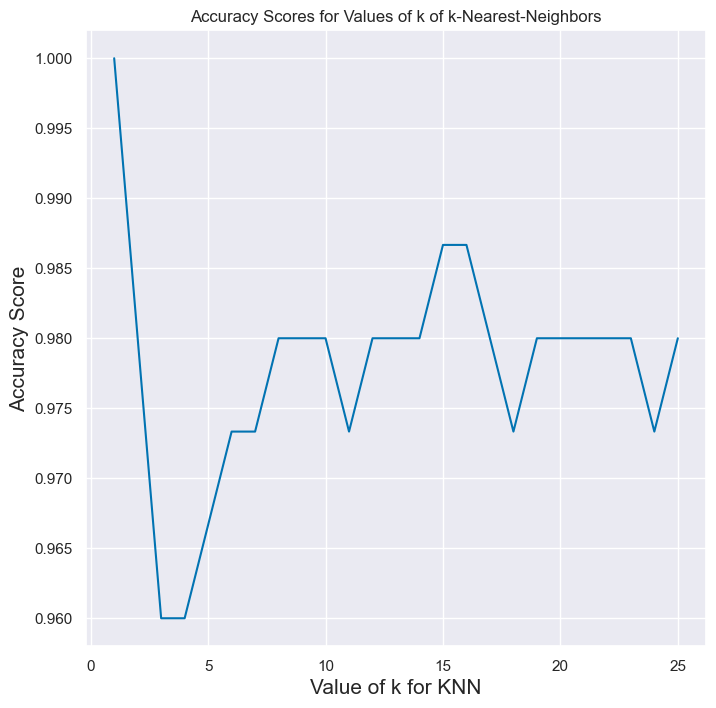

In [42]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [44]:
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


In [46]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(x_train, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(x_test, y_test)))

The accuracy of the svm classifier on training data is 0.97 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


In [ ]:
https://www.kaggle.com/code/midouazerty/iris-data-with-98-accuracy-score#knn